In [2]:
import numpy as np 
import pandas as pd

### Read data

In [3]:
df = pd.read_csv('../../data/raw/all_teams_data.csv')
pd.options.display.max_columns = None
df.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss_x,Attendance,Captain,Formation,Opp Formation,Referee,Notes,Standard__Gls,Standard__Sh,Standard__SoT,Standard__SoT%,Standard__G/Sh,Standard__G/SoT,Standard__Dist,Standard__FK,Standard__PK,Standard__PKatt,Expected__xG,Expected__npxG,Expected__npxG/Sh,Expected__G-xG,Expected__np:G-xG,Performance__SoTA,Performance__GA,Performance__Saves,Performance__Save%,Performance__CS,Performance__PSxG,Performance__PSxG+/-,Penalty Kicks__PKatt,Penalty Kicks__PKA,Penalty Kicks__PKsv,Penalty Kicks__PKm,Launched__Cmp,Launched__Att,Launched__Cmp%,Passes__Att (GK),Passes__Thr,Passes__Launch%,Passes__AvgLen,Goal Kicks__Att,Goal Kicks__Launch%,Goal Kicks__AvgLen,Crosses__Opp,Crosses__Stp,Crosses__Stp%,Sweeper__#OPA,Sweeper__AvgDist,Total__Cmp,Total__Att,Total__Cmp%,Total__TotDist,Total__PrgDist,Short__Cmp,Short__Att,Short__Cmp%,Medium__Cmp,Medium__Att,Medium__Cmp%,Long__Cmp,Long__Att,Long__Cmp%,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP,Att,Pass Types__Live,Pass Types__Dead,Pass Types__FK,Pass Types__TB,Pass Types__Sw,Pass Types__Crs,Pass Types__TI,Pass Types__CK,Corner Kicks__In,Corner Kicks__Out,Corner Kicks__Str,Outcomes__Cmp,Outcomes__Off,Outcomes__Blocks,SCA Types__SCA,SCA Types__PassLive,SCA Types__PassDead,SCA Types__TO,SCA Types__Sh,SCA Types__Fld,SCA Types__Def,GCA Types__GCA,GCA Types__PassLive,GCA Types__PassDead,GCA Types__TO,GCA Types__Sh,GCA Types__Fld,GCA Types__Def,Tackles__Tkl,Tackles__TklW,Tackles__Def 3rd,Tackles__Mid 3rd,Tackles__Att 3rd,Challenges__Tkl,Challenges__Att,Challenges__Tkl%,Challenges__Lost,Blocks__Blocks,Blocks__Sh,Blocks__Pass,Int,Tkl+Int,Clr,Err,Poss_y,Touches__Touches,Touches__Def Pen,Touches__Def 3rd,Touches__Mid 3rd,Touches__Att 3rd,Touches__Att Pen,Touches__Live,Take-Ons__Att,Take-Ons__Succ,Take-Ons__Succ%,Take-Ons__Tkld,Take-Ons__Tkld%,Carries__Carries,Carries__TotDist,Carries__PrgDist,Carries__PrgC,Carries__1/3,Carries__CPA,Carries__Mis,Carries__Dis,Receiving__Rec,Receiving__PrgR,Performance__CrdY,Performance__CrdR,Performance__2CrdY,Performance__Fls,Performance__Fld,Performance__Off,Performance__Crs,Performance__Int,Performance__TklW,Performance__PKwon,Performance__PKcon,Performance__OG,Performance__Recov,Aerial Duels__Won,Aerial Duels__Lost,Aerial Duels__Won%,Season,Team
0,2017-08-18,20:15,La Liga,Matchweek 1,Fri,Away,L,0,1,Leganés,1.1,1.3,47.0,9231.0,Manu García,4-4-2,4-2-3-1,José Munuera,NaN,0,8.0,4.0,50.0,0.0,0.0,22.8,0.0,0,1,1.1,0.4,0.04,-1.1,-0.4,3.0,1.0,2.0,66.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,21.0,23.8,30.0,4.0,46.7,33.0,7.0,100.0,57.3,11.0,1.0,9.1,2.0,14.3,252.0,385.0,65.5,4587.0,1900.0,119.0,145.0,82.1,98.0,138.0,71.0,33.0,82.0,40.2,0,0.3,0.4,7.0,19.0,2.0,0.0,18.0,385.0,330.0,55.0,19.0,1.0,5.0,10.0,25.0,2.0,1.0,0.0,1.0,252.0,0.0,10.0,15.0,7.0,3.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,13.0,10.0,9.0,0.0,8.0,15.0,53.3,7.0,14.0,5.0,9.0,14.0,33,17.0,1.0,47.0,503.0,47.0,200.0,222.0,89.0,10.0,502.0,18.0,8.0,44.4,10.0,55.6,235.0,1359.0,652.0,10.0,8.0,4.0,19.0,13.0,250.0,18.0,1,0,0,17.0,17.0,0.0,10.0,14.0,13.0,1.0,0.0,0.0,60.0,16.0,30.0,34.8,2017,Alaves
1,2017-08-26,18:15,La Liga,Matchweek 2,Sat,Home,L,0,2,Barcelona,0.9,2.5,27.0,19356.0,Manu García,4-5-1,4-3-3,Carlos del Cerro,NaN,0,11.0,2.0,18.2,0.0,0.0,21.7,2.0,0,0,0.9,0.9,0.09,-0.9,-0.9,11.0,2.0,8.0,81.8,0.0,2.3,0.3,1.0,0.0,1.0,0.0,10.0,17.0,58.8,26.0,4.0,53.8,38.9,5.0,60.0,48.6,13.0,0.0,0.0,0.0,7.7,202.0,281.0,71.9,3959.0,1914.0,85.0,99.0,85.9,73.0,97.0,75.3,34.0,67.0,50.7,0,0.8,0.3,6.0,14.0,1.0,0.0,13.0,281.0,257.0,23.0,7.0,1.0,4.0,5.0,7.0,1.0,1.0,0.0,0.0,202.0,1.0,4.0,19.0,9.0,2.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,18.0,19.0,4.0,2.0,11.0,32.0,34.4,21.0,14.0,7.0,7.0,15.0,40,30.0,1.0,27.0,396.0,80.0,213.0,140.0,48.0,9.0,396.0,16.0,8.0,50.0,8.0,50.0,258.0,1290.0,662.0,7.0,2.0,4.0,10.0,5.0,199.0,13.0,2,0,0,12.0,9.0,1.0,5.0,15.0,18.0,0.0,1.0,0.0,57.0,8.0,6.0,57.1,2017,Alaves
2,2017-09-10,18:30,La Liga,Matchweek 3,Sun,Away,L,0,1,Celta Vigo,0.5,2.7,34.0,17384.0,Fernando Pacheco,4-

In [4]:
df['Comp'].value_counts()

Comp
La Liga                5520
Copa del Rey            540
Champions Lg            281
Europa Lg               228
Supercopa de España      36
Conf Lg                  17
Super Cup                 8
Name: count, dtype: int64

In [5]:
import numpy as np

# Replace empty strings with NaN
df.replace('', np.nan, inplace=True)

# Calculate the percentage of missing values
missing_percentage = df.isnull().mean() * 100
missing_percentage[missing_percentage > 10]

Attendance          17.390649
Notes               92.202112
Sweeper__AvgDist    14.600302
dtype: float64

### La Liga data

In [6]:
df = df[df['Comp'] == 'La Liga']

In [7]:
df.columns.to_list()

['Date',
 'Time',
 'Comp',
 'Round',
 'Day',
 'Venue',
 'Result',
 'GF',
 'GA',
 'Opponent',
 'xG',
 'xGA',
 'Poss_x',
 'Attendance',
 'Captain',
 'Formation',
 'Opp Formation',
 'Referee',
 'Notes',
 'Standard__Gls',
 'Standard__Sh',
 'Standard__SoT',
 'Standard__SoT%',
 'Standard__G/Sh',
 'Standard__G/SoT',
 'Standard__Dist',
 'Standard__FK',
 'Standard__PK',
 'Standard__PKatt',
 'Expected__xG',
 'Expected__npxG',
 'Expected__npxG/Sh',
 'Expected__G-xG',
 'Expected__np:G-xG',
 'Performance__SoTA',
 'Performance__GA',
 'Performance__Saves',
 'Performance__Save%',
 'Performance__CS',
 'Performance__PSxG',
 'Performance__PSxG+/-',
 'Penalty Kicks__PKatt',
 'Penalty Kicks__PKA',
 'Penalty Kicks__PKsv',
 'Penalty Kicks__PKm',
 'Launched__Cmp',
 'Launched__Att',
 'Launched__Cmp%',
 'Passes__Att (GK)',
 'Passes__Thr',
 'Passes__Launch%',
 'Passes__AvgLen',
 'Goal Kicks__Att',
 'Goal Kicks__Launch%',
 'Goal Kicks__AvgLen',
 'Crosses__Opp',
 'Crosses__Stp',
 'Crosses__Stp%',
 'Sweeper__#OPA',

In [8]:
# columns_to_drop = [col for col in df.columns if col.startswith('Expected') or col.startswith('x')]

# df.drop(columns=columns_to_drop, inplace=True)
# df.head()

In [9]:
%cd ../

d:\dev\project\Football-Match-Prediction\src


In [10]:
from preprocessing.preprocess import *
df2 = preprocess_data(df)
df2.sort_values(by='Time', inplace=True)

In [11]:
object_columns = df2.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Comp', 'Result', 'Opponent', 'Captain', 'Formation', 'Opp Formation',
       'Referee', 'Team'],
      dtype='object')


In [12]:
# df2.drop(columns = ['Captain', 'Formation', 'Opp Formation'], inplace=True)

In [13]:
import numpy as np

# Replace empty strings with NaN
df2.replace('', np.nan, inplace=True)

# Calculate the percentage of missing values
missing_percentage = df2.isnull().mean() * 100
sorted(missing_percentage[missing_percentage > 0].items(), key=lambda x: x[1], reverse=True)

[('Standard__G/SoT', 3.5869565217391304),
 ('Performance__Save%', 3.152173913043478),
 ('Referee', 0.9782608695652175),
 ('Launched__Cmp%', 0.30797101449275366),
 ('Goal Kicks__Launch%', 0.14492753623188406),
 ('Goal Kicks__AvgLen', 0.14492753623188406),
 ('Expected__npxG/Sh', 0.05434782608695652),
 ('Standard__SoT%', 0.036231884057971016),
 ('Standard__G/Sh', 0.036231884057971016),
 ('Standard__Dist', 0.036231884057971016),
 ('Crosses__Stp%', 0.036231884057971016),
 ('Performance__GA', 0.018115942028985508),
 ('Performance__CS', 0.018115942028985508),
 ('Performance__PSxG+/-', 0.018115942028985508),
 ('Penalty Kicks__PKatt', 0.018115942028985508),
 ('Penalty Kicks__PKA', 0.018115942028985508),
 ('Penalty Kicks__PKsv', 0.018115942028985508),
 ('Penalty Kicks__PKm', 0.018115942028985508),
 ('Crosses__Stp', 0.018115942028985508),
 ('Sweeper__#OPA', 0.018115942028985508)]

G/SoT missing because SoT = 0

Save% missing because SoT = 0

#### How many seasons are there ?

In [14]:
num_seasons = df2['Season'].nunique()
print(f'There are {num_seasons} seasons in the data.')

There are 8 seasons in the data.


#### How many teams are there ?

In [15]:
num_teams = df2['Team'].nunique()
print(f'There are {num_teams} teams in the data.')

There are 29 teams in the data.


In [16]:
from unidecode import unidecode

df2['Opponent'] = df2['Opponent'].apply(unidecode)

In [17]:
df2.loc[df2['Opponent'] == 'La Coruna', 'Opponent'] = 'Deportivo La Coruna'
df2.loc[df2['Opponent'] == 'Betis', 'Opponent'] = 'Real Betis'

#### How many decisive games ?

In [18]:
decisive_games = df2[df2['Result'] != 'D'].shape[0]
print(f'There are {decisive_games / 2} decisive games in the data.')

There are 2015.0 decisive games in the data.


#### Overall results of each team through out 8 seasons

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of wins, draws, and losses for each team
results = df2.groupby('Team')['Result'].value_counts().unstack().fillna(0)
results.columns = ['Draws', 'Losses', 'Wins']
# Calculate total matches and win, draw, loss percentages
results['Total Matches'] = results.sum(axis=1)
results['Win %'] = (results['Wins'] / results['Total Matches']) * 100
results['Draw %'] = (results['Draws'] / results['Total Matches']) * 100
results['Loss %'] = (results['Losses'] / results['Total Matches']) * 100

# Sort the columns order
results = results[['Total Matches', 'Wins', 'Win %', 'Draws', 'Draw %', 'Losses', 'Loss %']]

# Add 'Team' column
results = results.reset_index()

Which teams have the highest win %

In [20]:
results.sort_values(by='Win %', ascending=False)

,Team,Total Matches,Wins,Win %,Draws,Draw %,Losses,Loss %
4,Barcelona,276,187,67.753623,53,19.202899,36,13.043478
23,Real Madrid,276,180,65.217391,58,21.014493,38,13.768116
3,Atletico Madrid,276,162,58.695652,69,25.000000,45,16.304348
25,Sevilla,276,121,43.840580,73,26.449275,82,29.710145
24,Real Sociedad,276,117,42.391304,71,25.724638,88,31.884058
28,Villarreal,276,115,41.666667,72,26.086957,89,32.246377
22,Real Betis,276,113,40.942029,70,25.362319,93,33.695652
12,Girona,162,64,39.506173,38,23.456790,60,37.037037
2,Athletic Club,276,99,35.869565,87,31.521739,90,32.608696
26,Valencia,276,97,35.144928,84,30.434783,95,34.420290


Which teams score the most goals ?

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of goals for, goals against, goals diff of each team
team_goals = df2.groupby('Team').agg({
    'GF': 'sum',
    'GA': 'sum'
}).reset_index()

# Calculate Goal Difference (GD)
team_goals['GD'] = team_goals['GF'] - team_goals['GA']

# Sort the teams by Goal Difference
team_goals = team_goals.sort_values(by='GD', ascending=False)

team_goals

,Team,GF,GA,GD
4,Barcelona,610.0,253.0,357.0
23,Real Madrid,557.0,243.0,314.0
3,Atletico Madrid,452.0,228.0,224.0
28,Villarreal,434.0,355.0,79.0
24,Real Sociedad,376.0,310.0,66.0
25,Sevilla,376.0,325.0,51.0
2,Athletic Club,337.0,301.0,36.0
12,Girona,241.0,226.0,15.0
26,Valencia,349.0,338.0,11.0
22,Real Betis,368.0,358.0,10.0


Final table of each seasons

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

for season in sorted(df2['Season'].unique()):
    table = df2[df2['Season'] == season].groupby('Team')
    result_sum = table['Points'].sum().sort_values(ascending=False)
    print(f'Season {season} - Total Results: {result_sum}')
    num_matches = table['Points'].count()
    if num_matches.iloc[0] != 38:
        print(f"Warning: The number of matches for season {season} is {num_matches.iloc[0]}, which is different from 38.")

Season 2017 - Total Results: Team
Barcelona              93
Atletico Madrid        79
Real Madrid            76
Valencia               73
Villarreal             61
Real Betis             60
Sevilla                58
Getafe                 55
Eibar                  51
Girona                 51
Celta Vigo             49
Espanyol               49
Real Sociedad          49
Alaves                 47
Levante                46
Leganes                43
Athletic Club          43
Deportivo La Coruna    29
Las Palmas             22
Malaga                 20
Name: Points, dtype: int64
Season 2018 - Total Results: Team
Barcelona          87
Atletico Madrid    76
Real Madrid        68
Valencia           61
Getafe             59
Sevilla            59
Espanyol           53
Athletic Club      53
Alaves             50
Real Betis         50
Real Sociedad      50
Eibar              47
Leganes            45
Levante            44
Villarreal         44
Celta Vigo         41
Valladolid         41
Girona     

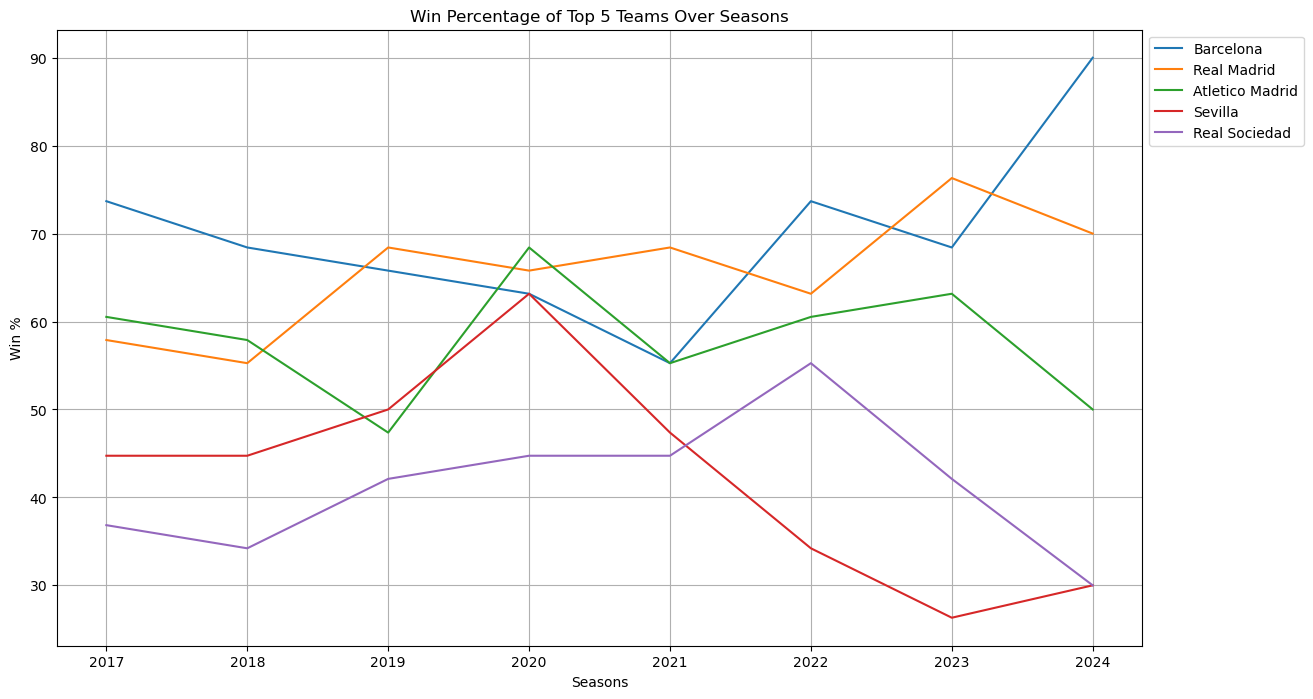

In [23]:
import matplotlib.pyplot as plt

# Plot the first 5 best teams
plt.figure(figsize=(14, 8))
for team in results.sort_values(by='Win %', ascending=False)['Team'].head(5):
    team_data = df2[df2['Team'] == team]
    win_percentage = team_data.groupby('Season')['Result'].apply(lambda x: (x == 'W').mean() * 100)
    plt.plot(win_percentage.index, win_percentage.values, label=team)

plt.xlabel('Seasons')
plt.ylabel('Win %')
plt.title('Win Percentage of Top 5 Teams Over Seasons')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

#### Describe univariate variables

In [24]:
prematch_cols = ['Time',
 'Comp',
 'Round',
 'Day',
 'Venue',
 'Opponent',
 'Captain',
 'Formation',
 'Opp Formation',
 'Referee',
 'Season',
 'Team']
shooting_cols = ['Standard__Gls',
 'Standard__Sh',
 'Standard__SoT',
 'Standard__SoT%',
 'Standard__G/Sh',
 'Standard__G/SoT',
 'Standard__Dist',
 'Standard__FK',
 'Standard__PK',
 'Standard__PKatt']
goal_keeping_cols = ['Performance__SoTA',
 'Performance__GA',
 'Performance__Saves',
 'Performance__Save%',
 'Performance__CS',
 'Performance__PSxG',
 'Performance__PSxG+/-',
 'Penalty Kicks__PKatt',
 'Penalty Kicks__PKA',
 'Penalty Kicks__PKsv',
 'Penalty Kicks__PKm',
 'Launched__Cmp',
 'Launched__Att',
 'Launched__Cmp%',
 'Passes__Att (GK)',
 'Passes__Thr',
 'Passes__Launch%',
 'Passes__AvgLen',
 'Goal Kicks__Att',
 'Goal Kicks__Launch%',
 'Goal Kicks__AvgLen',
 'Crosses__Opp',
 'Crosses__Stp',
 'Crosses__Stp%',
 'Sweeper__#OPA']
passing_cols = ['Total__Cmp',
 'Total__Att',
 'Total__Cmp%',
 'Total__TotDist',
 'Total__PrgDist',
 'Short__Cmp',
 'Short__Att',
 'Short__Cmp%',
 'Medium__Cmp',
 'Medium__Att',
 'Medium__Cmp%',
 'Long__Cmp',
 'Long__Att',
 'Long__Cmp%',
 'Ast',
 'KP',
 '1/3',
 'PPA',
 'CrsPA',
 'PrgP']
pass_type_cols = ['Att',
 'Pass Types__Live',
 'Pass Types__Dead',
 'Pass Types__FK',
 'Pass Types__TB',
 'Pass Types__Sw',
 'Pass Types__Crs',
 'Pass Types__TI',
 'Pass Types__CK',
 'Corner Kicks__In',
 'Corner Kicks__Out',
 'Corner Kicks__Str',
 'Outcomes__Cmp',
 'Outcomes__Off',
 'Outcomes__Blocks']
goal_shot_creation_cols = ['SCA Types__SCA',
 'SCA Types__PassLive',
 'SCA Types__PassDead',
 'SCA Types__TO',
 'SCA Types__Sh',
 'SCA Types__Fld',
 'SCA Types__Def',
 'GCA Types__GCA',
 'GCA Types__PassLive',
 'GCA Types__PassDead',
 'GCA Types__TO',
 'GCA Types__Sh',
 'GCA Types__Fld',
 'GCA Types__Def']
defensive_actions_cols = ['Tackles__Tkl',
 'Tackles__TklW',
 'Tackles__Def 3rd',
 'Tackles__Mid 3rd',
 'Tackles__Att 3rd',
 'Challenges__Tkl',
 'Challenges__Att',
 'Challenges__Tkl%',
 'Challenges__Lost',
 'Blocks__Blocks',
 'Blocks__Sh',
 'Blocks__Pass',
 'Int',
 'Tkl+Int',
 'Clr',
 'Err']
possession_cols = ['Poss',
 'Touches__Touches',
 'Touches__Def Pen',
 'Touches__Def 3rd',
 'Touches__Mid 3rd',
 'Touches__Att 3rd',
 'Touches__Att Pen',
 'Touches__Live',
 'Take-Ons__Att',
 'Take-Ons__Succ',
 'Take-Ons__Succ%',
 'Take-Ons__Tkld',
 'Take-Ons__Tkld%',
 'Carries__Carries',
 'Carries__TotDist',
 'Carries__PrgDist',
 'Carries__PrgC',
 'Carries__1/3',
 'Carries__CPA',
 'Carries__Mis',
 'Carries__Dis',
 'Receiving__Rec',
 'Receiving__PrgR']
miscellaneous_cols = ['Performance__CrdY',
 'Performance__CrdR',
 'Performance__2CrdY',
 'Performance__Fls',
 'Performance__Fld',
 'Performance__Off',
 'Performance__Crs',
 'Performance__Int',
 'Performance__TklW',
 'Performance__PKwon',
 'Performance__PKcon',
 'Performance__OG',
 'Performance__Recov',
 'Aerial Duels__Won',
 'Aerial Duels__Lost',
 'Aerial Duels__Won%']

In [25]:
df2[prematch_cols].head()

,Time,Comp,Round,Day,Venue,Opponent,Captain,Formation,Opp Formation,Referee,Season,Team
0,2017-08-18 20:15:00,La Liga,1,5,0,Leganes,Manu García,4-4-2,4-2-3-1,José Munuera,2017,Alaves
3293,2017-08-18 20:15:00,La Liga,1,5,1,Alaves,Martín Mantovani,4-2-3-1,4-4-2,José Munuera,2017,Leganes
3200,2017-08-18 22:15:00,La Liga,1,5,0,Valencia,Jonathan Viera,4-1-4-1,4-4-2,Jesús Gil,2017,Las Palmas
5750,2017-08-18 22:15:00,La Liga,1,5,1,Las Palmas,Daniel Parejo,4-4-2,4-1-4-1,Jesús Gil,2017,Valencia
1601,2017-08-19 18:15:00,La Liga,1,6,1,Real Sociedad,Hugo Mallo,4-3-3,4-3-3,Antonio Matéu Lahoz,2017,Celta Vigo


In [26]:
df2.describe()

,Time,Round,Day,Venue,GF,GA,xG,xGA,Standard__Gls,Standard__Sh,Standard__SoT,Standard__SoT%,Standard__G/Sh,Standard__G/SoT,Standard__Dist,Standard__FK,Standard__PK,Standard__PKatt,Expected__xG,Expected__npxG,Expected__npxG/Sh,Expected__G-xG,Expected__np:G-xG,Performance__SoTA,Performance__GA,Performance__Saves,Performance__Save%,Performance__CS,Performance__PSxG,Performance__PSxG+/-,Penalty Kicks__PKatt,Penalty Kicks__PKA,Penalty Kicks__PKsv,Penalty Kicks__PKm,Launched__Cmp,Launched__Att,Launched__Cmp%,Passes__Att (GK),Passes__Thr,Passes__Launch%,Passes__AvgLen,Goal Kicks__Att,Goal Kicks__Launch%,Goal Kicks__AvgLen,Crosses__Opp,Crosses__Stp,Crosses__Stp%,Sweeper__#OPA,Total__Cmp,Total__Att,Total__Cmp%,Total__TotDist,Total__PrgDist,Short__Cmp,Short__Att,Short__Cmp%,Medium__Cmp,Medium__Att,Medium__Cmp%,Long__Cmp,Long__Att,Long__Cmp%,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP,Att,Pass Types__Live,Pass Types__Dead,Pass Types__FK,Pass Types__TB,Pass Types__Sw,Pass Types__Crs,Pass Types__TI,Pass Types__CK,Corner Kicks__In,Corner Kicks__Out,Corner Kicks__Str,Outcomes__Cmp,Outcomes__Off,Outcomes__Blocks,SCA Types__SCA,SCA Types__PassLive,SCA Types__PassDead,SCA Types__TO,SCA Types__Sh,SCA Types__Fld,SCA Types__Def,GCA Types__GCA,GCA Types__PassLive,GCA Types__PassDead,GCA Types__TO,GCA Types__Sh,GCA Types__Fld,GCA Types__Def,Tackles__Tkl,Tackles__TklW,Tackles__Def 3rd,Tackles__Mid 3rd,Tackles__Att 3rd,Challenges__Tkl,Challenges__Att,Challenges__Tkl%,Challenges__Lost,Blocks__Blocks,Blocks__Sh,Blocks__Pass,Int,Tkl+Int,Clr,Err,Touches__Touches,Touches__Def Pen,Touches__Def 3rd,Touches__Mid 3rd,Touches__Att 3rd,Touches__Att Pen,Touches__Live,Take-Ons__Att,Take-Ons__Succ,Take-Ons__Succ%,Take-Ons__Tkld,Take-Ons__Tkld%,Carries__Carries,Carries__TotDist,Carries__PrgDist,Carries__PrgC,Carries__1/3,Carries__CPA,Carries__Mis,Carries__Dis,Receiving__Rec,Receiving__PrgR,Performance__CrdY,Performance__CrdR,Performance__2CrdY,Performance__Fls,Performance__Fld,Performance__Off,Performance__Crs,Performance__Int,Performance__TklW,Performance__PKwon,Performance__PKcon,Performance__OG,Performance__Recov,Aerial Duels__Won,Aerial Duels__Lost,Aerial Duels__Won%,Season,Points,Poss
count,5520,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5518.000000,5518.000000,5322.000000,5518.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5517.000000,5520.000000,5520.000000,5520.000000,5519.000000,5520.000000,5346.000000,5519.000000,5520.000000,5519.000000,5519.000000,5519.000000,5519.000000,5519.000000,5520.000000,5520.000000,5503.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5512.000000,5512.000000,5520.000000,5519.000000,5518.000000,5519.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.00000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5

#### Check categorical variable

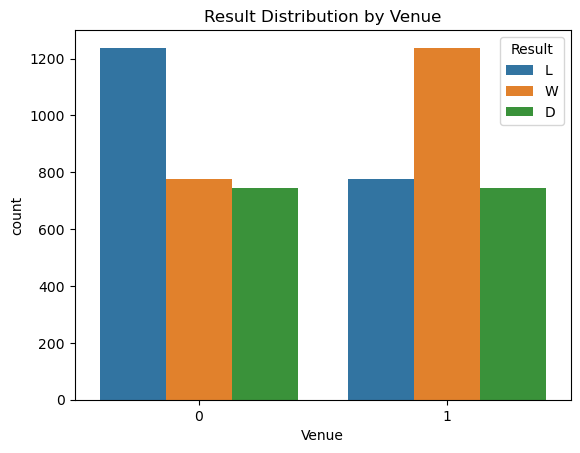

In [27]:
import seaborn as sns

sns.countplot(data=df2, x='Venue', hue='Result')
plt.title('Result Distribution by Venue')
plt.show()

In [28]:
# Calculate win percentage for each team under different referees
referee_performance = df2.groupby(['Referee', 'Team'])['Result'].apply(lambda x: (x == 'W').mean() * 100).reset_index()

# Find the referee with the highest win percentage for each team
best_referee_for_team = referee_performance.loc[referee_performance.groupby('Team')['Result'].idxmax()]

# Rename columns for clarity
best_referee_for_team.columns = ['Referee', 'Team', 'Win %']

best_referee_for_team.sort_values(by='Win %', ascending=False)

,Referee,Team,Win %
136,Alfonso Álvarez,Alaves,100.000000
332,Francisco Hernández,Granada,100.000000
481,Javier Villanueva,Valladolid,100.000000
150,Alfonso Álvarez,Valencia,100.000000
712,Mateo Busquets,Sevilla,100.000000
73,Alberto Undiano,Real Sociedad,100.000000
147,Alfonso Álvarez,Real Madrid,100.000000
163,Antonio Matéu,Real Betis,100.000000
133,Alejandro Quintero,Rayo Vallecano,100.000000
160,Antonio Matéu,Mallorca,100.000000


In [29]:
# Calculate win percentage for each formation
formation_win_percentage = df2.groupby('Formation')['Result'].apply(lambda x: (x == 'W').mean() * 100).reset_index()

# Rename columns for clarity
formation_win_percentage.columns = ['Formation', 'Win %']

# Sort the formations by win percentage
formation_win_percentage = formation_win_percentage.sort_values(by='Win %', ascending=False)

formation_win_percentage

,Formation,Win %
5,3-4-3◆,100.000000
6,3-5-1-1,55.555556
14,4-3-1-2,53.488372
1,3-2-4-1,50.000000
8,4-1-2-1-2◆,49.295775
16,4-3-3,47.727273
11,4-2-2-2,42.857143
7,3-5-2,38.157895
4,3-4-3,37.454545
9,4-1-3-2,36.274510


#### Check numerical variables

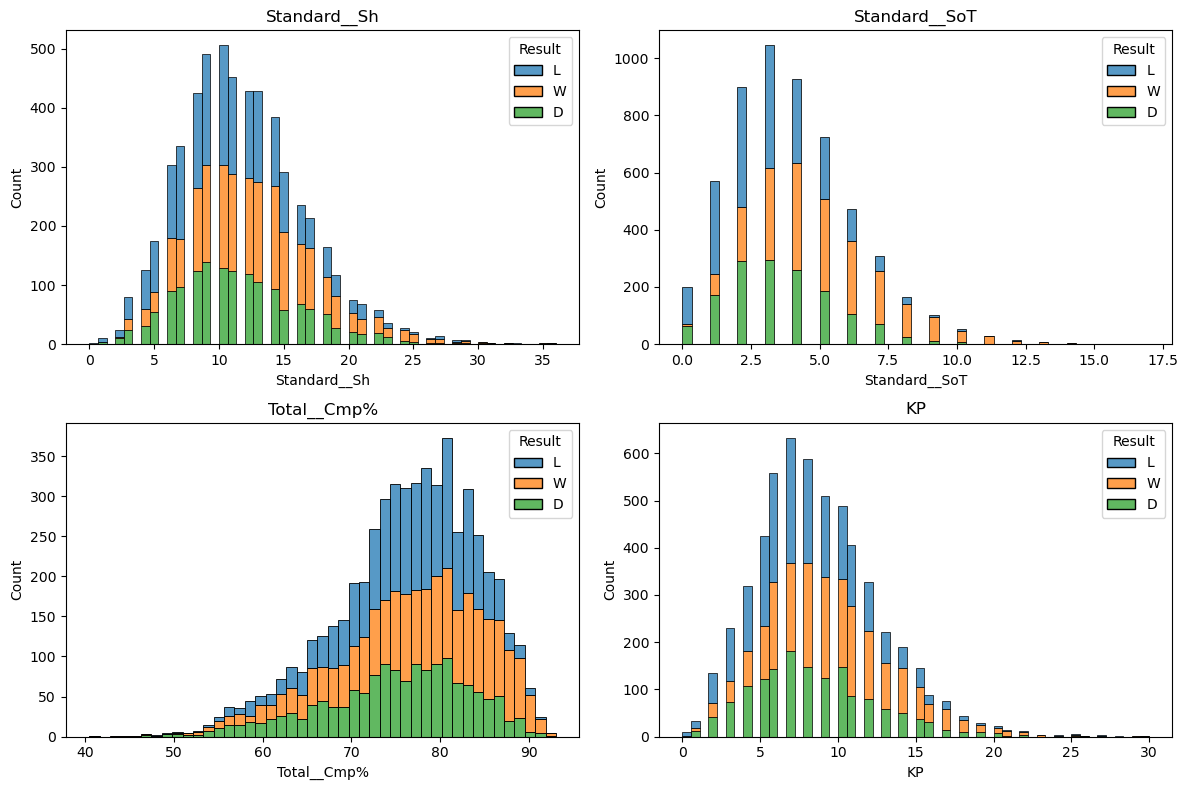

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, cols in zip(axes.flatten(), ['Standard__Sh', 'Standard__SoT', 'Total__Cmp%', 'KP']):
    sns.histplot(data=df2, x=cols, hue='Result', multiple='stack', ax=ax)
    ax.set_title(cols)

plt.tight_layout()
plt.show()

#### Calculate Correlations

C:\Users\tu7ph\AppData\Local\Temp\ipykernel_13628\1724056199.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result_correlation.values, y=result_correlation.index, palette='viridis', orient='h')


<Axes: title={'center': 'Correlation of Features with Goal Difference'}, ylabel='None'>

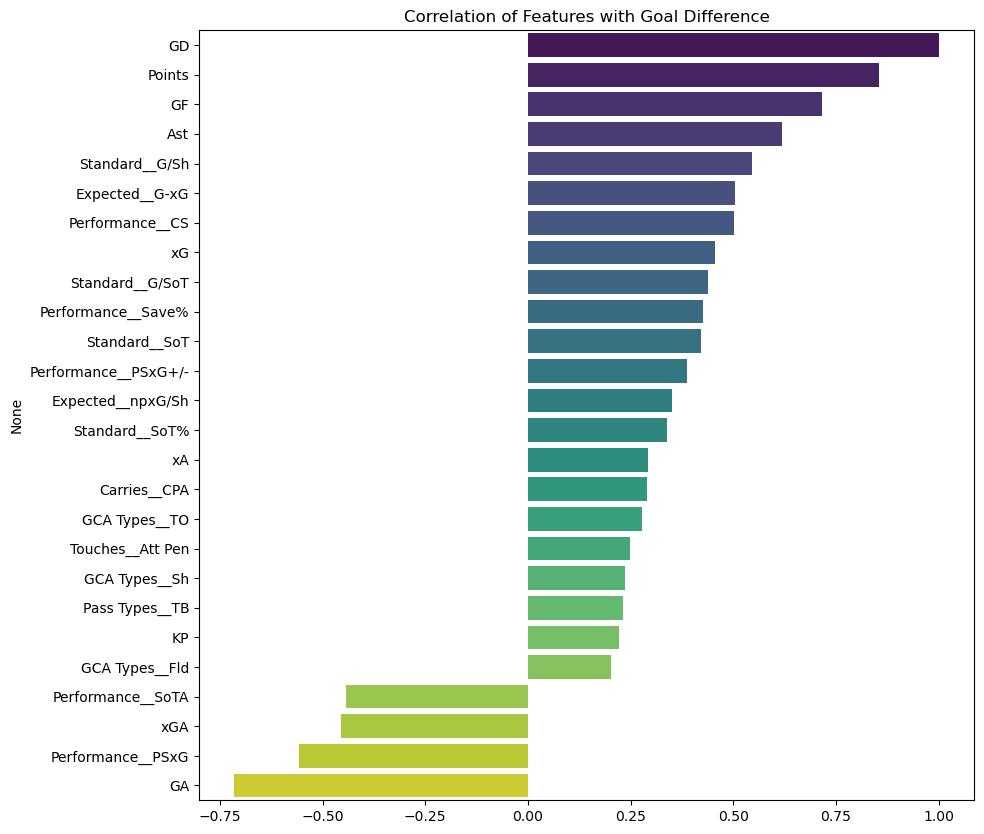

In [62]:
# Map the 'Result' column to numerical values
# result_mapping = {'W': 2, 'D': 1, 'L': 0}
# df2['Result_num'] = df2['Result'].map(result_mapping)
df2['GD'] = df2['GF'] - df2['GA']
# Select only numeric columns
numeric_df2 = df2.drop(columns=prematch_cols).select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df2.corr()

result_correlation = correlation_matrix['GD'].round(3).sort_values(ascending=False)
pd.options.display.max_rows = None

plt.figure(figsize=(10, 10))
plt.title('Correlation of Features with Goal Difference')
sns.barplot(x=result_correlation.values, y=result_correlation.index, palette='viridis', orient='h')

Correlation of shooting stats with goals

In [32]:
correlation_matrix['GF'][shooting_cols]

Standard__Gls      0.986545
Standard__Sh       0.253375
Standard__SoT      0.553236
Standard__SoT%     0.445238
Standard__G/Sh     0.761364
Standard__G/SoT    0.636913
Standard__Dist    -0.228074
Standard__FK       0.026042
Standard__PK       0.270969
Standard__PKatt    0.245409
Name: GF, dtype: float64

Correlation of goal keeping stats with goals against

In [33]:
correlation_matrix['GA'][goal_keeping_cols]

Performance__SoTA       0.588443
Performance__GA         1.000000
Performance__Saves      0.115530
Performance__Save%     -0.614517
Performance__CS        -0.693435
Performance__PSxG       0.761396
Performance__PSxG+/-   -0.567285
Penalty Kicks__PKatt    0.245231
Penalty Kicks__PKA      0.270930
Penalty Kicks__PKsv     0.026985
Penalty Kicks__PKm     -0.000562
Launched__Cmp          -0.073298
Launched__Att          -0.100588
Launched__Cmp%          0.015540
Passes__Att (GK)       -0.059663
Passes__Thr             0.035118
Passes__Launch%        -0.051414
Passes__AvgLen         -0.069565
Goal Kicks__Att        -0.088001
Goal Kicks__Launch%    -0.072758
Goal Kicks__AvgLen     -0.073658
Crosses__Opp           -0.183191
Crosses__Stp           -0.133671
Crosses__Stp%          -0.067069
Sweeper__#OPA           0.068576
Name: GA, dtype: float64

In [34]:
df2.reset_index(drop=True, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Columns: 165 entries, Time to GD
dtypes: datetime64[ns](1), float64(143), int64(13), object(8)
memory usage: 6.9+ MB


In [35]:
# df2.to_csv('D:\dev\project\Football-Match-Prediction\data\processed/la_liga_data.csv', index=False)

In [36]:
df2 = pd.read_csv('D:\dev\project\Football-Match-Prediction\data\processed/la_liga_data.csv')
df2.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Captain,Formation,Opp Formation,Referee,Standard__Gls,Standard__Sh,Standard__SoT,Standard__SoT%,Standard__G/Sh,Standard__G/SoT,Standard__Dist,Standard__FK,Standard__PK,Standard__PKatt,Expected__xG,Expected__npxG,Expected__npxG/Sh,Expected__G-xG,Expected__np:G-xG,Performance__SoTA,Performance__GA,Performance__Saves,Performance__Save%,Performance__CS,Performance__PSxG,Performance__PSxG+/-,Penalty Kicks__PKatt,Penalty Kicks__PKA,Penalty Kicks__PKsv,Penalty Kicks__PKm,Launched__Cmp,Launched__Att,Launched__Cmp%,Passes__Att (GK),Passes__Thr,Passes__Launch%,Passes__AvgLen,Goal Kicks__Att,Goal Kicks__Launch%,Goal Kicks__AvgLen,Crosses__Opp,Crosses__Stp,Crosses__Stp%,Sweeper__#OPA,Total__Cmp,Total__Att,Total__Cmp%,Total__TotDist,Total__PrgDist,Short__Cmp,Short__Att,Short__Cmp%,Medium__Cmp,Medium__Att,Medium__Cmp%,Long__Cmp,Long__Att,Long__Cmp%,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP,Att,Pass Types__Live,Pass Types__Dead,Pass Types__FK,Pass Types__TB,Pass Types__Sw,Pass Types__Crs,Pass Types__TI,Pass Types__CK,Corner Kicks__In,Corner Kicks__Out,Corner Kicks__Str,Outcomes__Cmp,Outcomes__Off,Outcomes__Blocks,SCA Types__SCA,SCA Types__PassLive,SCA Types__PassDead,SCA Types__TO,SCA Types__Sh,SCA Types__Fld,SCA Types__Def,GCA Types__GCA,GCA Types__PassLive,GCA Types__PassDead,GCA Types__TO,GCA Types__Sh,GCA Types__Fld,GCA Types__Def,Tackles__Tkl,Tackles__TklW,Tackles__Def 3rd,Tackles__Mid 3rd,Tackles__Att 3rd,Challenges__Tkl,Challenges__Att,Challenges__Tkl%,Challenges__Lost,Blocks__Blocks,Blocks__Sh,Blocks__Pass,Int,Tkl+Int,Clr,Err,Touches__Touches,Touches__Def Pen,Touches__Def 3rd,Touches__Mid 3rd,Touches__Att 3rd,Touches__Att Pen,Touches__Live,Take-Ons__Att,Take-Ons__Succ,Take-Ons__Succ%,Take-Ons__Tkld,Take-Ons__Tkld%,Carries__Carries,Carries__TotDist,Carries__PrgDist,Carries__PrgC,Carries__1/3,Carries__CPA,Carries__Mis,Carries__Dis,Receiving__Rec,Receiving__PrgR,Performance__CrdY,Performance__CrdR,Performance__2CrdY,Performance__Fls,Performance__Fld,Performance__Off,Performance__Crs,Performance__Int,Performance__TklW,Performance__PKwon,Performance__PKcon,Performance__OG,Performance__Recov,Aerial Duels__Won,Aerial Duels__Lost,Aerial Duels__Won%,Season,Team,Points,Poss,GD
0,2017-08-18 20:15:00,La Liga,1,5,0,L,0.0,1.0,Leganes,1.1,1.3,Manu García,4-4-2,4-2-3-1,José Munuera,0,8.0,4.0,50.0,0.00,0.00,22.8,0.0,0,1,1.1,0.4,0.04,-1.1,-0.4,3.0,1.0,2.0,66.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,21.0,23.8,30.0,4.0,46.7,33.0,7.0,100.0,57.3,11.0,1.0,9.1,2.0,252.0,385.0,65.5,4587.0,1900.0,119.0,145.0,82.1,98.0,138.0,71.0,33.0,82.0,40.2,0,0.3,0.4,7.0,19.0,2.0,0.0,18.0,385.0,330.0,55.0,19.0,1.0,5.0,10.0,25.0,2.0,1.0,0.0,1.0,252.0,0.0,10.0,15.0,7.0,3.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,13.0,10.0,9.0,0.0,8.0,15.0,53.3,7.0,14.0,5.0,9.0,14.0,33,17.0,1.0,503.0,47.0,200.0,222.0,89.0,10.0,502.0,18.0,8.0,44.4,10.0,55.6,235.0,1359.0,652.0,10.0,8.0,4.0,19.0,13.0,250.0,18.0,1,0,0,17.0,17.0,0.0,10.0,14.0,13.0,1.0,0.0,0.0,60.0,16.0,30.0,34.8,2017,Alaves,0,47.0,-1.0
1,2017-08-18 20:15:00,La Liga,1,5,1,W,1.0,0.0,Alaves,1.3,1.1,Martín Mantovani,4-2-3-1,4-4-2,José Munuera,1,14.0,3.0,21.4,0.07,0.33,22.0,2.0,0,0,1.3,1.3,0.10,-0.3,-0.3,5.0,0.0,4.0,100.0,1.0,1.6,1.6,1.0,0.0,1.0,0.0,9.0,26.0,34.6,26.0,5.0,80.8,49.7,5.0,100.0,67.8,8.0,0.0,0.0,0.0,292.0,432.0,67.6,5388.0,2489.0,142.0,177.0,80.2,105.0,139.0,75.5,35.0,86.0,40.7,0,0.4,0.9,7.0,39.0,10.0,2.0,36.0,432.0,374.0,55.0,15.0,0.0,5.0,12.0,30.0,4.0,0.0,3.0,0.0,292.0,3.0,10.0,22.0,11.0,2.0,1.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,15.0,14.0,7.0,2.0,10.0,18.0,55.6,8.0,9.0,1.0,8.0,14.0,37,20.0,0.0,550.0,47.0,169.0,261.0,124.0,18.0,550.0,15.0,7.0,46.7,8.0,53.3,231.0,1312.0,484.0,4.0,5.0,0.0,24.0,11.0,290.0,36.0,0,0,0,17.0,16.0,3.0,12.0,14.0,15.0,0.0,1.0,0.0,55.0,30.0,16.0,65.2,2017,Leganes,3,53.0,1.0
2,2017-08-18 22:15:00,La Liga,1,5,0,L,0.0,1.0,Valencia,0.2,1.4,Jonathan Viera,4-1-4-1,4-4-2,Jesús Gil,0,5.0,4.0,80.0,0.00,0.00,25.4,1.0,0,0,0.2,0.2,0.05,-0.2,-0.2,6.0,1.

Drop columns with correlation with GD lower than 0.1

Dropped columns with correlation lower than 0.2: ['Day', 'Season']


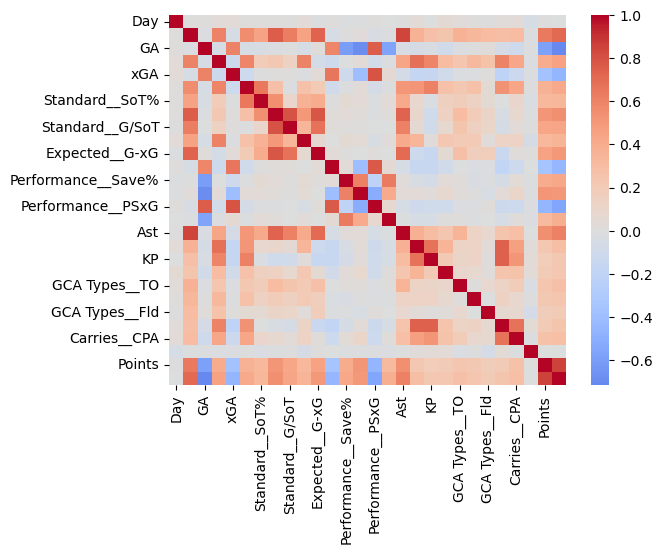

In [60]:
threshold = 0.2  # Set your threshold value here

# Get the correlation values for the 'GD' column
gd_correlation = correlation_matrix['GD']

# Find columns with correlation lower than the threshold
low_correlation_cols = gd_correlation[gd_correlation.abs() < threshold].index

sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)

# Drop these columns from the dataframe
df2.drop(columns=low_correlation_cols, inplace=True)

print(f"Dropped columns with correlation lower than {threshold}: {low_correlation_cols.tolist()}")

Removed redundant features: []


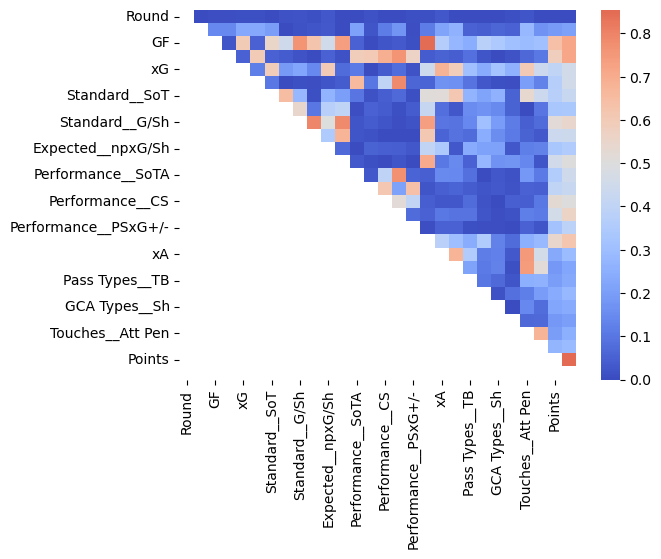

In [61]:
import numpy as np

# Select only numeric columns
numeric_df2 = df2.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df2.corr().abs()

# Select the upper triangle of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with high correlation (exceeding 0.9)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

# Drop the redundant features
df2.drop(columns=to_drop, inplace=True)

print(f"Removed redundant features: {to_drop}")

In [39]:
df2.columns.to_list()

['Time',
 'Comp',
 'Round',
 'Day',
 'Venue',
 'Result',
 'GF',
 'GA',
 'Opponent',
 'xG',
 'xGA',
 'Captain',
 'Formation',
 'Opp Formation',
 'Referee',
 'Standard__SoT',
 'Standard__SoT%',
 'Standard__G/Sh',
 'Standard__G/SoT',
 'Expected__npxG/Sh',
 'Expected__G-xG',
 'Performance__SoTA',
 'Performance__Save%',
 'Performance__CS',
 'Performance__PSxG',
 'Performance__PSxG+/-',
 'Ast',
 'xA',
 'KP',
 'Pass Types__TB',
 'GCA Types__TO',
 'GCA Types__Sh',
 'GCA Types__Fld',
 'Touches__Att Pen',
 'Carries__CPA',
 'Season',
 'Team',
 'Points',
 'GD']

In [40]:
import numpy as np

# Calculate the percentage of missing values
missing_percentage = df2.isnull().mean() * 100
sorted(missing_percentage[missing_percentage > 0].items(), key=lambda x: x[1], reverse=True)

[('Standard__G/SoT', 3.5869565217391304),
 ('Performance__Save%', 3.152173913043478),
 ('Referee', 0.9782608695652175),
 ('Expected__npxG/Sh', 0.05434782608695652),
 ('Standard__SoT%', 0.036231884057971016),
 ('Standard__G/Sh', 0.036231884057971016),
 ('Performance__CS', 0.018115942028985508),
 ('Performance__PSxG+/-', 0.018115942028985508)]

In [41]:
object_columns = df2.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Time', 'Comp', 'Result', 'Opponent', 'Captain', 'Formation',
       'Opp Formation', 'Referee', 'Team'],
      dtype='object')


In [42]:
df2.drop(columns=['Referee', 'Captain', 'Comp', 'Formation', 'Opp Formation'], inplace=True)

In [43]:
for col in df2.select_dtypes(include=[np.number]).columns:
    df2[col] = df2[col].fillna(df2.groupby('Team')[col].transform('mean'))
    # df2[cols] = df2[cols].fillna(df2.groupby('Team')[cols].mean()) 

In [44]:
import numpy as np

# Calculate the percentage of missing values
missing_percentage = df2.isnull().mean() * 100
sorted(missing_percentage[missing_percentage > 0].items(), key=lambda x: x[1], reverse=True)

[]

## Feature Engineering

In [45]:
feature_cols = [col for col in df2.columns if col not in prematch_cols]
feature_cols.remove('Result')
categorical_cols = [col for col in feature_cols if col not in df2.select_dtypes(include=[np.number]).columns]
print("Categorical columns:", categorical_cols)

Categorical columns: []


In [46]:
to_drop = ['Referee', 'Captain', 'Day', 'Comp', 'Season', 'Formation', 'Opp Formation']
for cols in to_drop: 
    prematch_cols.remove(cols)

In [47]:
# Sort the dataframe by time
df2.sort_values(by='Time', inplace=True)

# Modify the function to return only the weighted average columns
def calculate_weighted_avg_excluding_current(group, feature_cols, weight_col='Round'):
    weighted_avgs = pd.DataFrame(index=group.index)
    for col in feature_cols:
        cumulative_weighted = (group[col] * group[weight_col]).cumsum().shift(1)
        cumulative_weights = group[weight_col].cumsum().shift(1)
        weighted_avg = cumulative_weighted / cumulative_weights
        weighted_avgs[col + '_WeightedAvg'] = weighted_avg #.fillna(0)
    return weighted_avgs

# Apply the function to each team group
weightedAvg = df2.groupby('Team', group_keys=False).apply(calculate_weighted_avg_excluding_current, feature_cols=feature_cols)

# Display the DataFrame with weighted averages
weightedAvg.tail()

,GF_WeightedAvg,GA_WeightedAvg,xG_WeightedAvg,xGA_WeightedAvg,Standard__SoT_WeightedAvg,Standard__SoT%_WeightedAvg,Standard__G/Sh_WeightedAvg,Standard__G/SoT_WeightedAvg,Expected__npxG/Sh_WeightedAvg,Expected__G-xG_WeightedAvg,Performance__SoTA_WeightedAvg,Performance__Save%_WeightedAvg,Performance__CS_WeightedAvg,Performance__PSxG_WeightedAvg,Performance__PSxG+/-_WeightedAvg,Ast_WeightedAvg,xA_WeightedAvg,KP_WeightedAvg,Pass Types__TB_WeightedAvg,GCA Types__TO_WeightedAvg,GCA Types__Sh_WeightedAvg,GCA Types__Fld_WeightedAvg,Touches__Att Pen_WeightedAvg,Carries__CPA_WeightedAvg,Points_WeightedAvg,GD_WeightedAvg
5515,0.969228,1.034977,1.103861,1.129300,3.195910,30.953326,0.084394,0.271636,0.091481,-0.156231,3.457951,71.677651,0.364870,1.096693,0.102045,0.640864,0.680715,7.426797,0.720183,0.167813,0.116590,0.125765,16.954702,2.707569,1.241017,-0.065749
5516,1.372898,1.176988,1.372745,1.182282,4.019687,33.477179,0.103133,0.315376,0.102525,-0.031193,3.794916,74.513581,0.357927,1.122324,-0.018557,0.936162,0.954549,9.555428,1.017775,0.219992,0.162653,0.123471,21.543960,4.527332,1.604167,0.195910
5517,2.112003,0.944381,1.891093,1.080141,5.606843,39.467985,0.143469,0.357856,0.127510,0.169687,3.417431,76.339465,0.452599,0.960187,0.041227,1.513188,1.547668,11.063647,2.668578,0.240635,0.246177,0.224197,29.066896,6.830849,2.191323,1.167622
5518,1.208716,1.199732,1.218884,1.280887,3.507072,33.737997,0.104996,0.303377,0.101969,-0.062347,4.311162,75.084871,0.273891,1.284958,0.129109,0.823203,0.820107,7.923356,0.969801,0.149274,0.125000,0.191896,18.018922,3.729358,1.365443,0.008983
5519,0.698756,1.612967,0.930386,1.732351,2.986902,27.244139,0.055946,0.188586,0.076562,-0.232286,4.707269,64.182711,0.150622,1.652914,0.106745,0.447282,0.724427,7.669941,1.363458,0.060904,0.096922,0.067453,16.172888,3.222004,0.664047,-0.914211


#### Estimate current form by avg of last n rounds

In [48]:
# Define the window size for rolling averages
window_size = 5

# Function to calculate rolling averages
def calculate_rolling_averages(group):
    return group[feature_cols].shift().rolling(window=window_size, min_periods=1).mean()

# Apply the function to df2 grouped by 'Team'
rolling_averages = df2.groupby('Team', group_keys=False).apply(calculate_rolling_averages)

# Rename columns to indicate rolling averages
rolling_averages.columns = [f"{col}_avg" for col in rolling_averages.columns]
rolling_averages.tail()

,GF_avg,GA_avg,xG_avg,xGA_avg,Standard__SoT_avg,Standard__SoT%_avg,Standard__G/Sh_avg,Standard__G/SoT_avg,Expected__npxG/Sh_avg,Expected__G-xG_avg,Performance__SoTA_avg,Performance__Save%_avg,Performance__CS_avg,Performance__PSxG_avg,Performance__PSxG+/-_avg,Ast_avg,xA_avg,KP_avg,Pass Types__TB_avg,GCA Types__TO_avg,GCA Types__Sh_avg,GCA Types__Fld_avg,Touches__Att Pen_avg,Carries__CPA_avg,Points_avg,GD_avg
5515,1.0,1.0,1.14,1.18,3.8,30.74,0.048,0.134,0.078,-0.14,3.2,72.140000,0.2,1.06,0.06,0.4,0.78,8.2,0.4,0.2,0.4,0.4,19.8,3.8,1.0,0.0
5516,1.2,0.8,1.30,1.08,3.6,28.32,0.056,0.190,0.090,-0.50,3.6,76.000000,0.4,0.82,0.02,0.4,0.50,8.8,1.2,0.0,0.2,0.0,18.6,6.0,2.0,0.4
5517,3.0,1.2,2.24,1.42,7.4,47.60,0.190,0.382,0.136,0.76,3.2,78.000000,0.4,1.16,-0.02,2.4,1.34,12.0,2.8,0.2,0.2,0.4,26.8,5.6,2.4,1.8
5518,0.4,1.2,0.50,1.64,2.2,27.22,0.050,0.200,0.066,-0.10,3.0,69.893919,0.6,1.36,0.16,0.4,0.62,6.2,0.6,0.0,0.0,0.0,13.2,3.4,1.0,-0.8
5519,1.0,2.0,1.08,1.82,4.2,35.14,0.098,0.280,0.096,-0.08,4.2,47.420000,0.0,1.74,-0.26,0.8,1.00,10.0,1.6,0.0,0.0,0.2,23.0,5.0,0.2,-1.0


In [49]:
# Combine rolling averages with the original dataframe
training_df = pd.concat([df2[prematch_cols].reset_index(drop=True), weightedAvg.reset_index(drop=True), df2[['GF', 'GA', 'Result']].reset_index(drop=True)], axis=1)

# Drop rows with missing values
# training_df.dropna(inplace=True)

# # Your training data is now ready
training_df.head()

,Time,Round,Venue,Opponent,Team,GF_WeightedAvg,GA_WeightedAvg,xG_WeightedAvg,xGA_WeightedAvg,Standard__SoT_WeightedAvg,Standard__SoT%_WeightedAvg,Standard__G/Sh_WeightedAvg,Standard__G/SoT_WeightedAvg,Expected__npxG/Sh_WeightedAvg,Expected__G-xG_WeightedAvg,Performance__SoTA_WeightedAvg,Performance__Save%_WeightedAvg,Performance__CS_WeightedAvg,Performance__PSxG_WeightedAvg,Performance__PSxG+/-_WeightedAvg,Ast_WeightedAvg,xA_WeightedAvg,KP_WeightedAvg,Pass Types__TB_WeightedAvg,GCA Types__TO_WeightedAvg,GCA Types__Sh_WeightedAvg,GCA Types__Fld_WeightedAvg,Touches__Att Pen_WeightedAvg,Carries__CPA_WeightedAvg,Points_WeightedAvg,GD_WeightedAvg,GF,GA,Result
0,2017-08-18 20:15:00,1,0,Leganes,Alaves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,L
1,2017-08-18 20:15:00,1,1,Alaves,Leganes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,W
2,2017-08-18 22:15:00,1,0,Valencia,Las Palmas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,L
3,2017-08-18 22:15:00,1,1,Las Palmas,Valencia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,W
4,2017-08-19 18:15:00,1,1,Real Sociedad,Celta Vigo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,L


In [50]:
training_df.drop(columns=['Round'], inplace=True)

In [51]:
training_df.dropna(inplace=True)

In [52]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5491 entries, 20 to 5519
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Time                              5491 non-null   object 
 1   Venue                             5491 non-null   int64  
 2   Opponent                          5491 non-null   object 
 3   Team                              5491 non-null   object 
 4   GF_WeightedAvg                    5491 non-null   float64
 5   GA_WeightedAvg                    5491 non-null   float64
 6   xG_WeightedAvg                    5491 non-null   float64
 7   xGA_WeightedAvg                   5491 non-null   float64
 8   Standard__SoT_WeightedAvg         5491 non-null   float64
 9   Standard__SoT%_WeightedAvg        5491 non-null   float64
 10  Standard__G/Sh_WeightedAvg        5491 non-null   float64
 11  Standard__G/SoT_WeightedAvg       5491 non-null   float64
 12  Expected__

In [53]:
# Rename columns to include 'HomeTeam_' prefix where Venue == 1
df_team = training_df[training_df['Venue'] == 1].copy()
df_team['HomeTeam'] = df_team['Team']
df_team.drop(columns=['Team'], inplace=True)
df_team['AwayTeam'] = df_team['Opponent']
df_team.drop(columns=['Opponent'], inplace=True)
df_team = df_team.rename(columns=lambda x: f"HomeTeam_{x}" if x not in ['Time', 'Venue', 'HomeTeam', 'AwayTeam'] else x)
df_team.drop(columns=['Venue'], inplace=True)
df_opponent = training_df[training_df['Venue'] == 0].copy()
df_opponent['AwayTeam'] = df_opponent['Team']
df_opponent = df_opponent.drop(columns=['Team'])
df_opponent['HomeTeam'] = df_opponent['Opponent']
df_opponent = df_opponent.drop(columns=['Opponent'])
df_opponent = df_opponent.rename(columns=lambda x: f"AwayTeam_{x}" if x not in ['Time', 'Venue', 'HomeTeam', 'AwayTeam'] else x)
df_opponent.drop(columns=['Venue'], inplace=True)   
# Merge the two dataframes
df_merged = pd.merge(df_team, df_opponent, on=['Time', 'HomeTeam', 'AwayTeam'])

# Calculate head-to-head statistics

# Ensure training_df is sorted by 'Time'
training_df.sort_values('Time', inplace=True)

# Initialize a list to store head-to-head stats
h2h_stats = []

# Iterate over each match in df_merged
for index, row in df_merged.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    match_time = row['Time']
    
    # Filter past matches between the two teams
    past_matches = training_df[
        (((training_df['Team'] == home_team) & (training_df['Opponent'] == away_team)) |
         ((training_df['Team'] == away_team) & (training_df['Opponent'] == home_team))) &
        (training_df['Time'] < match_time)
    ]
    
    total_matches = len(past_matches)
    if total_matches == 0:
        home_wins = away_wins = draws = home_goals = away_goals = 0
    else:
        # Results from the perspective of the home team
        home_wins = ((past_matches['Team'] == home_team) & (past_matches['Result'] == 'W')).sum()
        away_wins = ((past_matches['Team'] == home_team) & (past_matches['Result'] == 'L')).sum()
        draws = (past_matches['Result'] == 'D').sum()
        
        # Goals scored by each team
        home_goals = past_matches.loc[past_matches['Team'] == home_team, 'GF'].sum() + \
                     past_matches.loc[past_matches['Opponent'] == home_team, 'GA'].sum()
        away_goals = past_matches.loc[past_matches['Team'] == away_team, 'GF'].sum() + \
                     past_matches.loc[past_matches['Opponent'] == away_team, 'GA'].sum()
    
    h2h_stats.append({
        'H2H_Total_Matches': total_matches,
        'H2H_Home_Wins': home_wins,
        'H2H_Away_Wins': away_wins,
        'H2H_Draws': draws,
        'H2H_Home_Goals': home_goals,
        'H2H_Away_Goals': away_goals,
    })

# Convert the list to a DataFrame
h2h_stats_df = pd.DataFrame(h2h_stats)

# Merge the head-to-head stats with the original dataframe
df_merged = pd.concat([df_merged.reset_index(drop=True), h2h_stats_df], axis=1)

In [54]:
df_merged.head()

,Time,HomeTeam_GF_WeightedAvg,HomeTeam_GA_WeightedAvg,HomeTeam_xG_WeightedAvg,HomeTeam_xGA_WeightedAvg,HomeTeam_Standard__SoT_WeightedAvg,HomeTeam_Standard__SoT%_WeightedAvg,HomeTeam_Standard__G/Sh_WeightedAvg,HomeTeam_Standard__G/SoT_WeightedAvg,HomeTeam_Expected__npxG/Sh_WeightedAvg,HomeTeam_Expected__G-xG_WeightedAvg,HomeTeam_Performance__SoTA_WeightedAvg,HomeTeam_Performance__Save%_WeightedAvg,HomeTeam_Performance__CS_WeightedAvg,HomeTeam_Performance__PSxG_WeightedAvg,HomeTeam_Performance__PSxG+/-_WeightedAvg,HomeTeam_Ast_WeightedAvg,HomeTeam_xA_WeightedAvg,HomeTeam_KP_WeightedAvg,HomeTeam_Pass Types__TB_WeightedAvg,HomeTeam_GCA Types__TO_WeightedAvg,HomeTeam_GCA Types__Sh_WeightedAvg,HomeTeam_GCA Types__Fld_WeightedAvg,HomeTeam_Touches__Att Pen_WeightedAvg,HomeTeam_Carries__CPA_WeightedAvg,HomeTeam_Points_WeightedAvg,HomeTeam_GD_WeightedAvg,HomeTeam_GF,HomeTeam_GA,HomeTeam_Result,HomeTeam,AwayTeam,AwayTeam_GF_WeightedAvg,AwayTeam_GA_WeightedAvg,AwayTeam_xG_WeightedAvg,AwayTeam_xGA_WeightedAvg,AwayTeam_Standard__SoT_WeightedAvg,AwayTeam_Standard__SoT%_WeightedAvg,AwayTeam_Standard__G/Sh_WeightedAvg,AwayTeam_Standard__G/SoT_WeightedAvg,AwayTeam_Expected__npxG/Sh_WeightedAvg,AwayTeam_Expected__G-xG_WeightedAvg,AwayTeam_Performance__SoTA_WeightedAvg,AwayTeam_Performance__Save%_WeightedAvg,AwayTeam_Performance__CS_WeightedAvg,AwayTeam_Performance__PSxG_WeightedAvg,AwayTeam_Performance__PSxG+/-_WeightedAvg,AwayTeam_Ast_WeightedAvg,AwayTeam_xA_WeightedAvg,AwayTeam_KP_WeightedAvg,AwayTeam_Pass Types__TB_WeightedAvg,AwayTeam_GCA Types__TO_WeightedAvg,AwayTeam_GCA Types__Sh_WeightedAvg,AwayTeam_GCA Types__Fld_WeightedAvg,AwayTeam_Touches__Att Pen_WeightedAvg,AwayTeam_Carries__CPA_WeightedAvg,AwayTeam_Points_WeightedAvg,AwayTeam_GD_WeightedAvg,AwayTeam_GF,AwayTeam_GA,AwayTeam_Result,H2H_Total_Matches,H2H_Home_Wins,H2H_Away_Wins,H2H_Draws,H2H_Home_Goals,H2H_Away_Goals
0,2017-08-25 20:15:00,3.0,2.0,2.1,1.8,5.0,41.7,0.17,0.40000,0.11,0.9,5.0,60.0,0.0,1.7,-0.3,1.0,1.2,9.0,1.0,0.0,0.0,1.0,14.0,3.0,3.0,1.0,3.0,0.0,W,Real Sociedad,Villarreal,0.0,1.0,0.5,1.4,1.0,12.5,0.00,0.0,0.06,-0.5,3.0,100.000000,0.0,1.3,0.3,0.0,0.4,8.0,2.0,0.0,0.0,0.0,9.0,3.0,0.0,-1.0,0.0,3.0,L,0,0,0,0,0.0,0.0
1,2017-08-25 22:00:00,0.0,2.0,0.1,1.1,0.0,0.0,0.00,0.26903,0.04,-0.1,2.0,0.0,0.0,0.7,-0.3,0.0,0.3,0.0,2.0,0.0,0.0,0.0,7.0,3.0,0.0,-2.0,2.0,1.0,W,Real Betis,Celta Vigo,2.0,3.0,1.8,2.1,5.0,31.3,0.13,0.4,0.11,0.2,6.0,66.700000,0.0,2.4,-0.6,1.0,0.9,14.0,1.0,0.0,1.0,0.0,23.0,7.0,0.0,-1.0,1.0,2.0,L,0,0,0,0,0.0,0.0
2,2017-08-26 18:15:00,0.0,1.0,1.1,1.3,4.0,50.0,0.00,0.00000,0.04,-1.1,3.0,66.7,0.0,1.0,0.0,0.0,0.4,7.0,1.0,0.0,0.0,0.0,10.0,4.0,0.0,-1.0,0.0,2.0,L,Alaves,Barcelona,2.0,0.0,1.1,0.1,2.0,13.3,0.07,0.5,0.07,-0.1,0.0,74.895489,1.0,0.0,0.0,1.0,1.4,10.0,1.0,0.0,0.0,0.0,36.0,15.0,3.0,2.0,2.0,0.0,W,0,0,0,0,0.0,0.0
3,2017-08-26 20:15:00,1.0,0.0,1.4,0.5,2.0,15.4,0.00,0.00000,0.05,-0.4,1.0,100.0,1.0,0.4,0.4,0.0,0.6,11.0,0.0,1.0,0.0,1.0,26.0,10.0,3.0,1.0,2.0,2.0,D,Levante,Deportivo La Coruna,0.0,3.0,1.7,2.1,4.0,36.4,0.00,0.0,0.09,-1.7,8.0,62.500000,0.0,1.9,-1.1,0.0,1.0,9.0,0.0,0.0,0.0,0.0,17.0,5.0,0.0,-3.0,2.0,2.0,D,0,0,0,0,0.0,0.0
4,2017-08-26 20:15:00,2.0,2.0,2.2,0.7,6.0,46.2,0.15,0.33000,0.17,-0.2,3.0,33.3,0.0,0.6,-1.4,1.0,1.6,9.0,0.0,0.0,0.0,1.0,25.0,2.0,1.0,0.0,1.0,0.0,W,Girona,Malaga,0.0,1.0,0.9,1.4,4.0,40.0,0.00,0.0,0.09,-0.9,6.0,83.300000,0.0,2.6,1.6,0.0,0.4,7.0,1.0,0.0,0.0,0.0,14.0,3.0,0.0,-1.0,0.0,1.0,L,0,0,0,0,0.0,0.0


In [55]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 67 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Time                                       2741 non-null   object 
 1   HomeTeam_GF_WeightedAvg                    2741 non-null   float64
 2   HomeTeam_GA_WeightedAvg                    2741 non-null   float64
 3   HomeTeam_xG_WeightedAvg                    2741 non-null   float64
 4   HomeTeam_xGA_WeightedAvg                   2741 non-null   float64
 5   HomeTeam_Standard__SoT_WeightedAvg         2741 non-null   float64
 6   HomeTeam_Standard__SoT%_WeightedAvg        2741 non-null   float64
 7   HomeTeam_Standard__G/Sh_WeightedAvg        2741 non-null   float64
 8   HomeTeam_Standard__G/SoT_WeightedAvg       2741 non-null   float64
 9   HomeTeam_Expected__npxG/Sh_WeightedAvg     2741 non-null   float64
 10  HomeTeam_Expected__G-xG_

In [56]:
df_merged.drop(columns=['HomeTeam_GA', 'AwayTeam_GA', 'AwayTeam_Result'], inplace=True)

In [57]:
# df_merged.to_csv('D:\dev\project\Football-Match-Prediction\data\processed\df_merged.csv', index=False)

<Axes: xlabel='HomeTeam_Result', ylabel='count'>

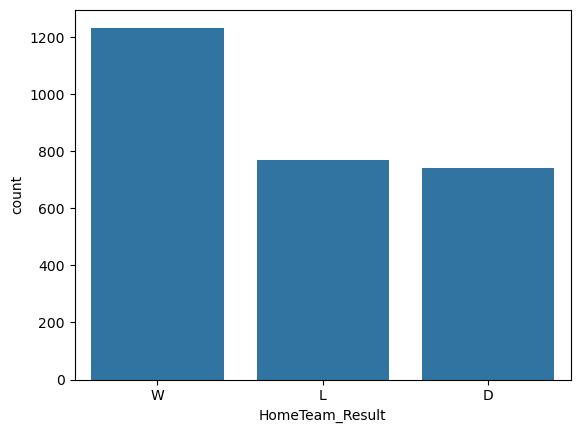

In [58]:
sns.countplot(data=df_merged, x='HomeTeam_Result')